In [26]:
!pip install keras_tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [27]:
df=pd.read_csv(r'C:\Users\shree\3D Objects\Assignment 16\forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### EDA

In [28]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [31]:
df.drop(columns=['month','day'],inplace=True)

In [32]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

## Visualization

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

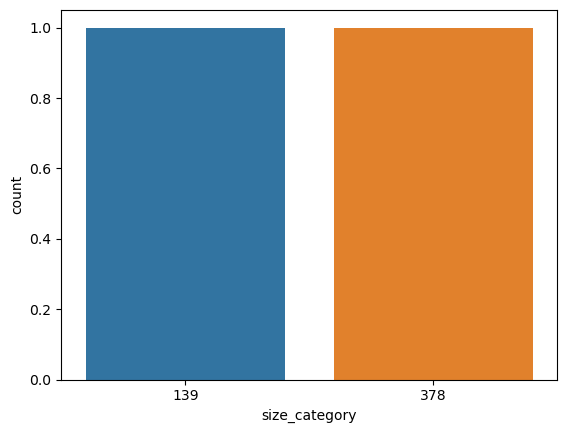

In [33]:
sns.countplot(df['size_category'].value_counts())

## Transformation

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [36]:
x=df.iloc[:,:-1]

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

### Model Building

In [40]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [41]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])

Epoch 1/350
13/13 [==============================] - 3s 48ms/step - loss: 0.7854 - val_loss: 0.7183
Epoch 2/350
13/13 [==============================] - 0s 13ms/step - loss: 0.7473 - val_loss: 0.6921
Epoch 3/350
13/13 [==============================] - 0s 13ms/step - loss: 0.7167 - val_loss: 0.6703
Epoch 4/350
13/13 [==============================] - 0s 16ms/step - loss: 0.6895 - val_loss: 0.6497
Epoch 5/350
13/13 [==============================] - 0s 17ms/step - loss: 0.6663 - val_loss: 0.6325
Epoch 6/350
13/13 [==============================] - 0s 17ms/step - loss: 0.6473 - val_loss: 0.6175
Epoch 7/350
13/13 [==============================] - 0s 15ms/step - loss: 0.6299 - val_loss: 0.6062
Epoch 8/350
13/13 [==============================] - 0s 14ms/step - loss: 0.6166 - val_loss: 0.5967
Epoch 9/350
13/13 [==============================] - 0s 13ms/step - loss: 0.6049 - val_loss: 0.5906
Epoch 10/350
13/13 [==============================] - 0s 13ms/step - loss: 0.5936 - val_loss: 0.5833

13/13 [==============================] - 0s 13ms/step - loss: 0.3360 - val_loss: 0.4594
Epoch 83/350
13/13 [==============================] - 0s 12ms/step - loss: 0.3344 - val_loss: 0.4585
Epoch 84/350
13/13 [==============================] - 0s 15ms/step - loss: 0.3324 - val_loss: 0.4596
Epoch 85/350
13/13 [==============================] - 0s 14ms/step - loss: 0.3307 - val_loss: 0.4586
Epoch 86/350
13/13 [==============================] - 0s 15ms/step - loss: 0.3283 - val_loss: 0.4571
Epoch 87/350
13/13 [==============================] - 0s 13ms/step - loss: 0.3264 - val_loss: 0.4569
Epoch 88/350
13/13 [==============================] - 0s 13ms/step - loss: 0.3242 - val_loss: 0.4534
Epoch 89/350
13/13 [==============================] - 0s 12ms/step - loss: 0.3220 - val_loss: 0.4495
Epoch 90/350
13/13 [==============================] - 0s 13ms/step - loss: 0.3193 - val_loss: 0.4472
Epoch 91/350
13/13 [==============================] - 0s 12ms/step - loss: 0.3170 - val_loss: 0.4459
Epo

13/13 [==============================] - 0s 12ms/step - loss: 0.2061 - val_loss: 0.3759
Epoch 163/350
13/13 [==============================] - 0s 12ms/step - loss: 0.2049 - val_loss: 0.3756
Epoch 164/350
13/13 [==============================] - 0s 13ms/step - loss: 0.2036 - val_loss: 0.3748
Epoch 165/350
13/13 [==============================] - 0s 12ms/step - loss: 0.2025 - val_loss: 0.3752
Epoch 166/350
13/13 [==============================] - 0s 12ms/step - loss: 0.2010 - val_loss: 0.3745
Epoch 167/350
13/13 [==============================] - 0s 13ms/step - loss: 0.2000 - val_loss: 0.3767
Epoch 168/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1986 - val_loss: 0.3773
Epoch 169/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1974 - val_loss: 0.3718
Epoch 170/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1962 - val_loss: 0.3704
Epoch 171/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1953 - val_loss: 0

13/13 [==============================] - 0s 12ms/step - loss: 0.1345 - val_loss: 0.3397
Epoch 243/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1331 - val_loss: 0.3407
Epoch 244/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1317 - val_loss: 0.3406
Epoch 245/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1313 - val_loss: 0.3387
Epoch 246/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1302 - val_loss: 0.3346
Epoch 247/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1299 - val_loss: 0.3327
Epoch 248/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1294 - val_loss: 0.3376
Epoch 249/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1292 - val_loss: 0.3384
Epoch 250/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1279 - val_loss: 0.3383
Epoch 251/350
13/13 [==============================] - 0s 12ms/step - loss: 0.1272 - val_loss: 0

13/13 [==============================] - 0s 13ms/step - loss: 0.0908 - val_loss: 0.3156
Epoch 323/350
13/13 [==============================] - 0s 13ms/step - loss: 0.0900 - val_loss: 0.3155


<AxesSubplot:>

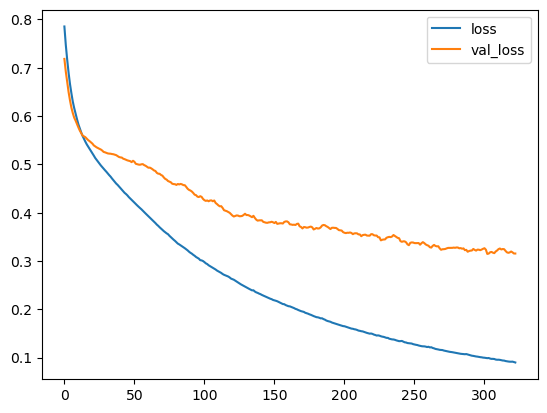

In [42]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [43]:
ypred=ann.predict(xtest)

5/5 [==============================] - 0s 9ms/step


In [44]:
ypred=ypred>0.5

In [45]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79        36
           1       0.89      0.99      0.93        94

    accuracy                           0.90       130
   macro avg       0.92      0.83      0.86       130
weighted avg       0.91      0.90      0.89       130



### Hyperparametertunning

In [46]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [47]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

In [48]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.7230769395828247

Best val_accuracy So Far: 0.7307692170143127
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


In [49]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 104,
 'activation0': 'sigmoid',
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu'}

In [50]:
x.shape

(517, 28)

In [51]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               3016      
                                                                 
 dense_1 (Dense)             (None, 8)                 840       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 8ms/step - loss: 0.6190 - accuracy: 0.7390
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6017 - accuracy: 0.7339
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5926 - accuracy: 0.7339
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5843 - accuracy: 0.7313
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5790 - accuracy: 0.7313
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5742 - accuracy: 0.7313
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5723 - accuracy: 0.7313
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5710 - accuracy: 0.7313
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5698 - accuracy: 0.7313
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5681 - accuracy: 0.7313
Epoch 11/

13/13 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.7545
Epoch 84/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5319 - accuracy: 0.7545
Epoch 85/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5308 - accuracy: 0.7545
Epoch 86/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5310 - accuracy: 0.7545
Epoch 87/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7571
Epoch 88/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5289 - accuracy: 0.7545
Epoch 89/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5284 - accuracy: 0.7545
Epoch 90/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7597
Epoch 91/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5266 - accuracy: 0.7545
Epoch 92/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5268 - accuracy: 0.7571
Epoch 93/100


In [53]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 1s 8ms/step - loss: 0.5645 - accuracy: 0.7385


[0.5645372271537781, 0.7384615540504456]

In [54]:
ypred=model.predict(xtest)
ypred

5/5 [==============================] - 0s 8ms/step


array([[0.8172312 ],
       [0.7164215 ],
       [0.79656154],
       [0.80769265],
       [0.81041175],
       [0.7369922 ],
       [0.7335262 ],
       [0.75885826],
       [0.79761326],
       [0.7791851 ],
       [0.7199514 ],
       [0.75681347],
       [0.45018739],
       [0.7923413 ],
       [0.7356132 ],
       [0.7847322 ],
       [0.8160762 ],
       [0.8039764 ],
       [0.80302775],
       [0.7681298 ],
       [0.78687614],
       [0.7310431 ],
       [0.7826977 ],
       [0.81218165],
       [0.79275316],
       [0.7383355 ],
       [0.7615695 ],
       [0.8092613 ],
       [0.7834775 ],
       [0.7396673 ],
       [0.7996224 ],
       [0.8105999 ],
       [0.76149464],
       [0.8065363 ],
       [0.75641406],
       [0.81478876],
       [0.7856326 ],
       [0.7912328 ],
       [0.6671232 ],
       [0.7971994 ],
       [0.71366286],
       [0.79302657],
       [0.74189025],
       [0.7983797 ],
       [0.7741561 ],
       [0.77207106],
       [0.741366  ],
       [0.778

In [55]:
ypred=ypred>0.5
ypred=pd.DataFrame(ypred)

In [56]:
ypred=ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Small
126,Large
127,Small
128,Small


C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

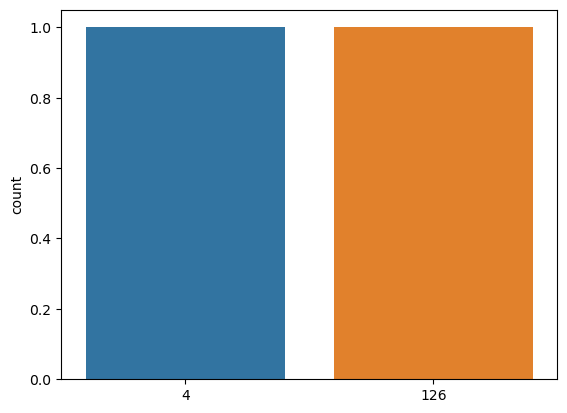

In [57]:
sns.countplot(ypred.value_counts())